Priscilla Philby Oommen

---

PowerCo Customer Churn Analysis

# Exploratory Data Analysis

## Import packages

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data with Pandas

We need to load client_data.csv and price_data.csv into individual dataframes so that we can work with them in Python.

In [26]:
# Import the dataset
client_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/client_data.csv")
price_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/price_data.csv")

In [27]:
# View the top 3 rows of df
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [28]:
# View the top 3 rows of df
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [29]:
# General info about the dataset
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [30]:
# General info about the dataset
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the describe() method.

In [31]:
# Summary statistics
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [32]:
# Check for missing values
# df.isnull().sum()
client_df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [33]:
client_df.duplicated().sum() # returns the number of duplicated values

0

In [34]:
# Summary statistics
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [35]:
# Check for missing values
# df.isnull().sum()
price_df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [36]:
price_df.duplicated().sum() # returns the number of duplicated values

0

There are no null values and duplicated values in client df and price df.

## Data visualization

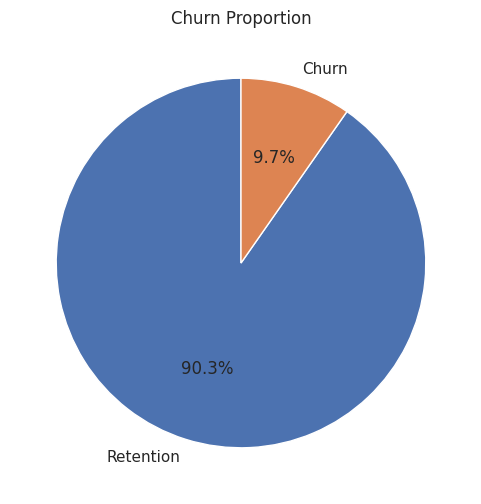

In [37]:
# Churn Proportion (Pie Chart)
# Proportion of Churn vs. Non-Churn
churn_counts = client_df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Retention', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Proportion')
plt.show()

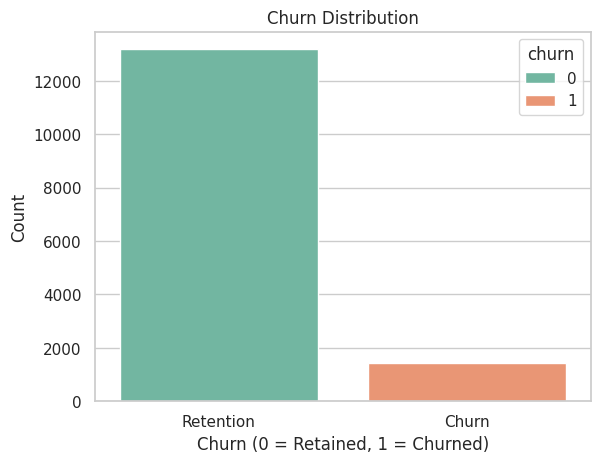

In [38]:
# Distribution of the Target Feature (churn)

sns.set_theme(style="whitegrid")  # Optional: to improve plot aesthetics
ax = sns.countplot(data=client_df, x='churn', palette='Set2', hue='churn')
plt.xlabel('Churn (0 = Retained, 1 = Churned)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Retention', 'Churn'])
plt.title('Churn Distribution')

plt.show()

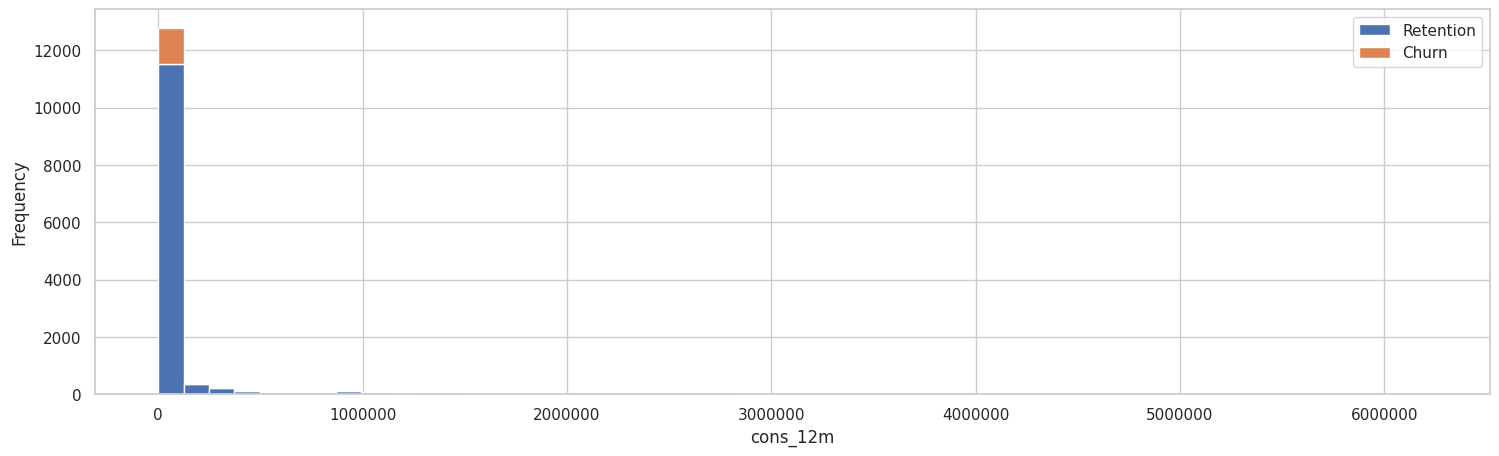

In [39]:
def plot_distribution(dataframe, column, ax, bins_=50):

    # Plot variable distirbution in a stacked histogram of churned or retained company

    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(consumption, 'cons_12m', axs)

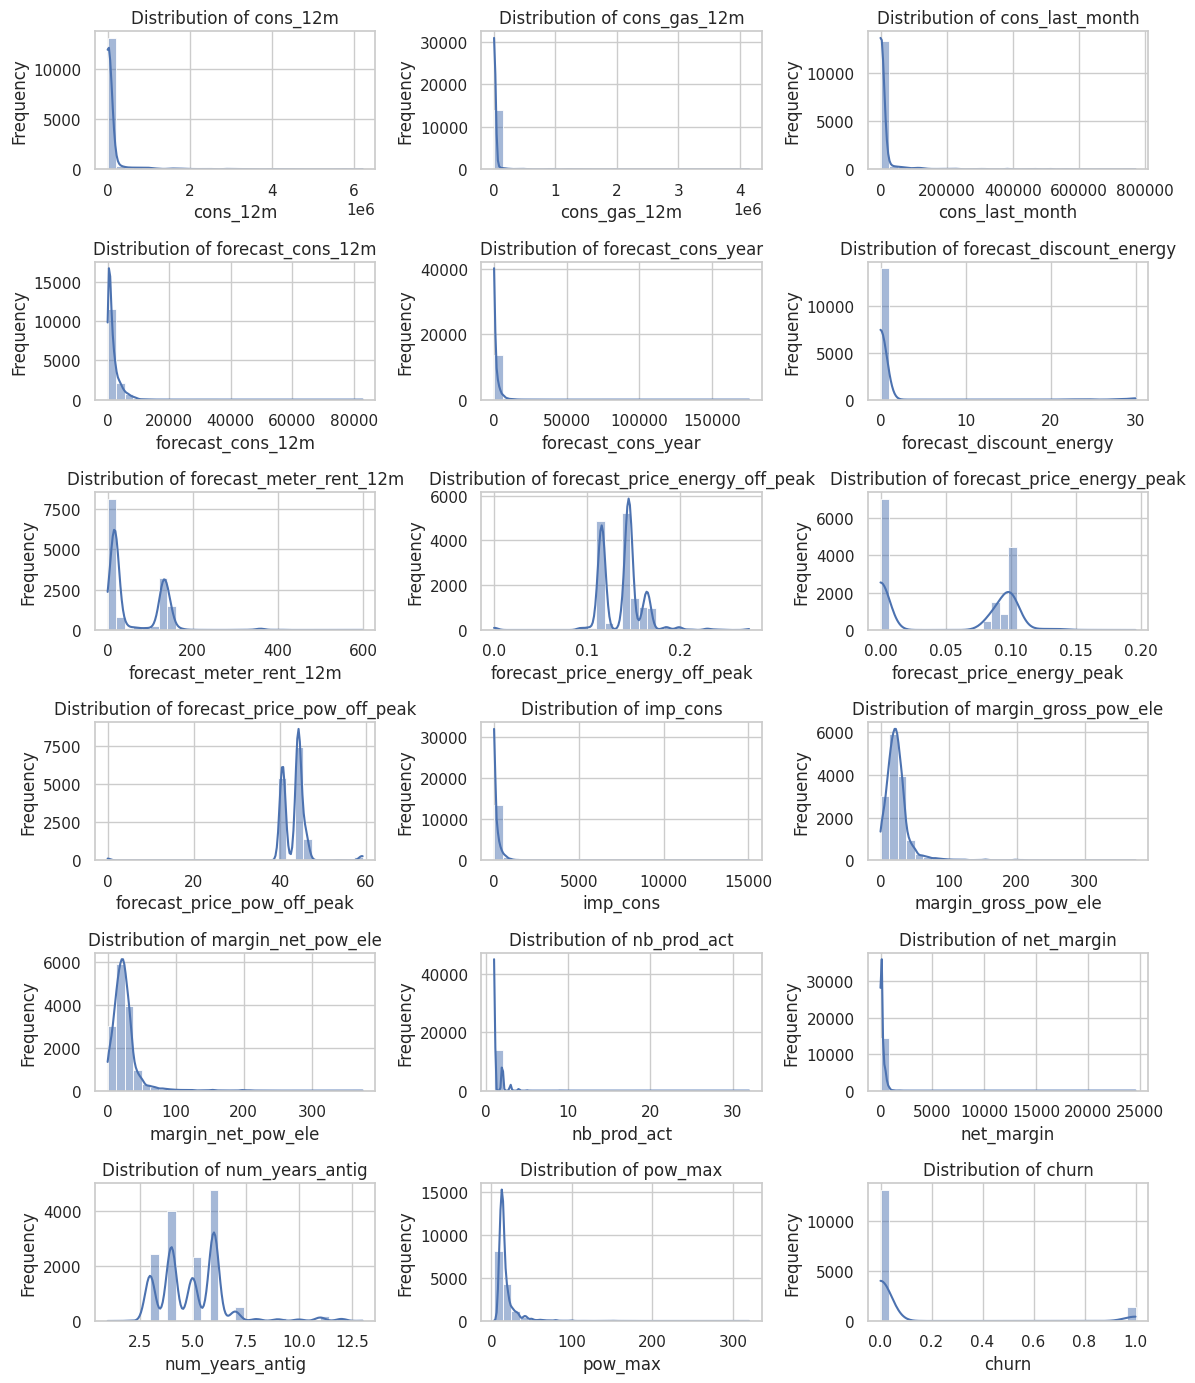

In [40]:
# Distribution of Numerical Features (Histograms)
# Histograms for numerical features

# Select numerical columns
numerical_columns = client_df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(12, 14)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(6, 3, i)  # Adjust rows and columns as per the number of features
    sns.histplot(data=client_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

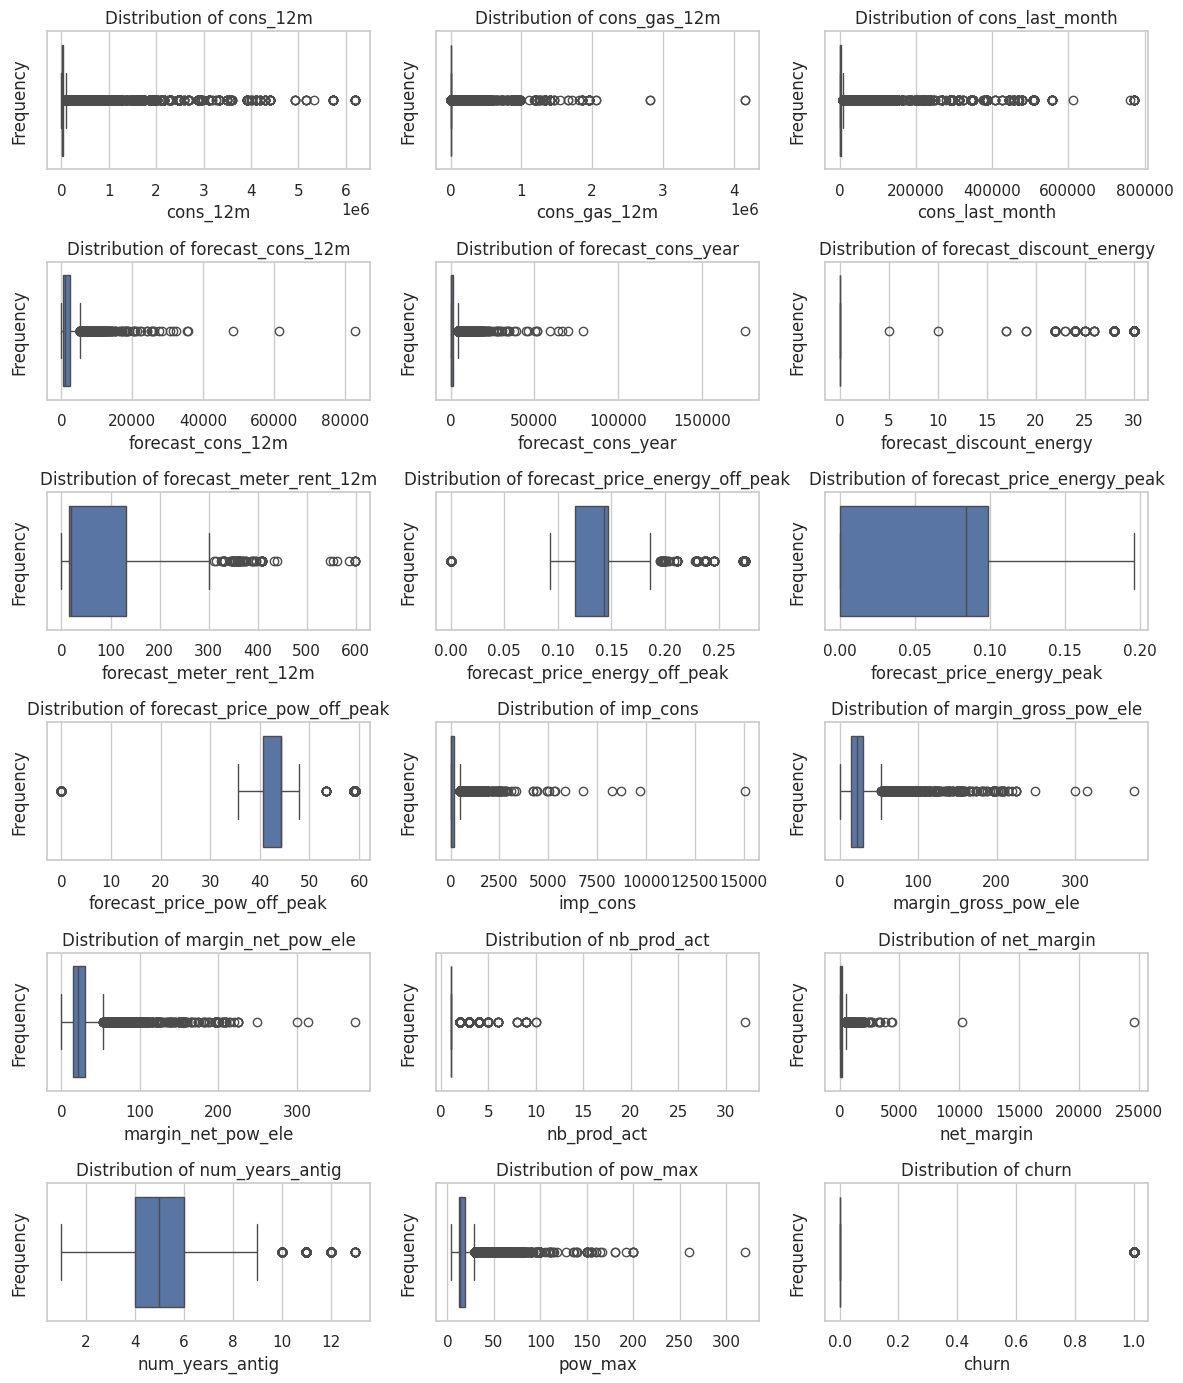

In [41]:
# Distribution of Numerical Features (Boxplot)
# Boxplots for numerical features

# Select numerical columns
numerical_columns = client_df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot to observe outliers
plt.figure(figsize=(12, 14)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(6, 3, i)  # Adjust rows and columns as per the number of features
    sns.boxplot(data=client_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust spacing between subplots
plt.show()

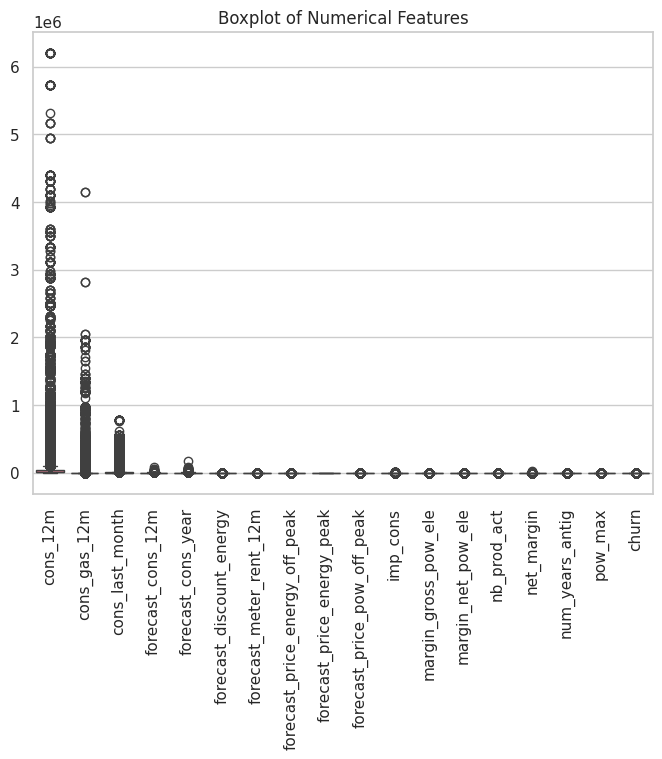

In [42]:
# Boxplot to Analyze Outliers
# Boxplot for numerical features
plt.figure(figsize=(8, 6))
sns.boxplot(data=client_df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

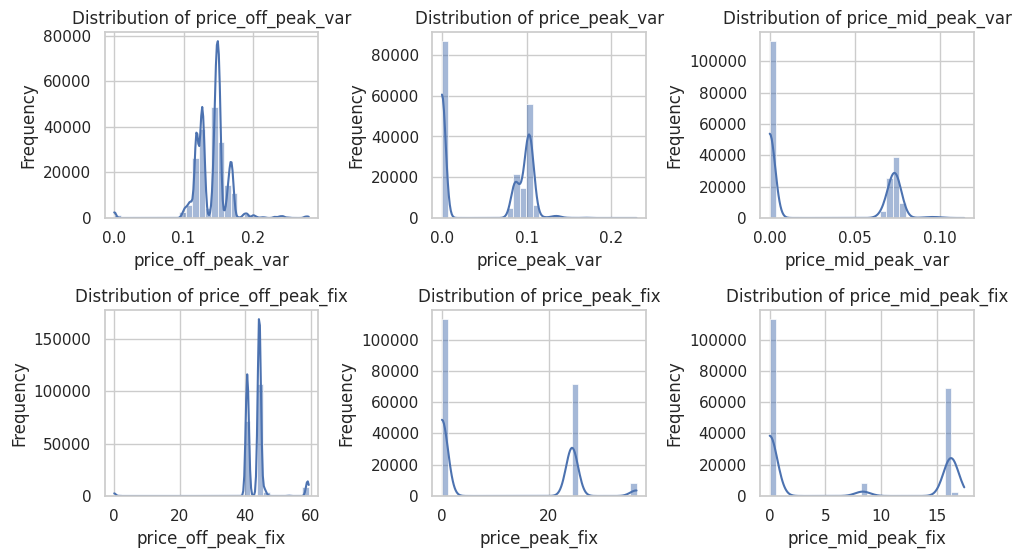

In [43]:
# Distribution of Numerical Features (Histograms)
# Histograms for numerical features

# Select numerical columns
numerical_columns = price_df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)  # Adjust rows and columns as per the number of features
    sns.histplot(data=price_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

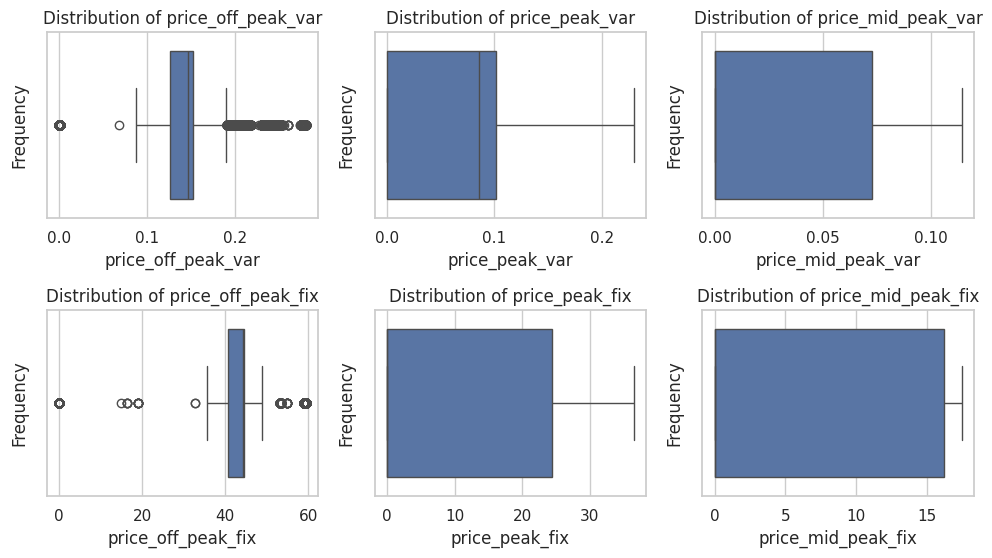

In [44]:
# Distribution of Numerical Features (Boxplot)
# Boxplots for numerical features

# Select numerical columns
numerical_columns = price_df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot to observe outliers
plt.figure(figsize=(10, 8)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 3, i)  # Adjust rows and columns as per the number of features
    sns.boxplot(data=price_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust spacing between subplots
plt.show()

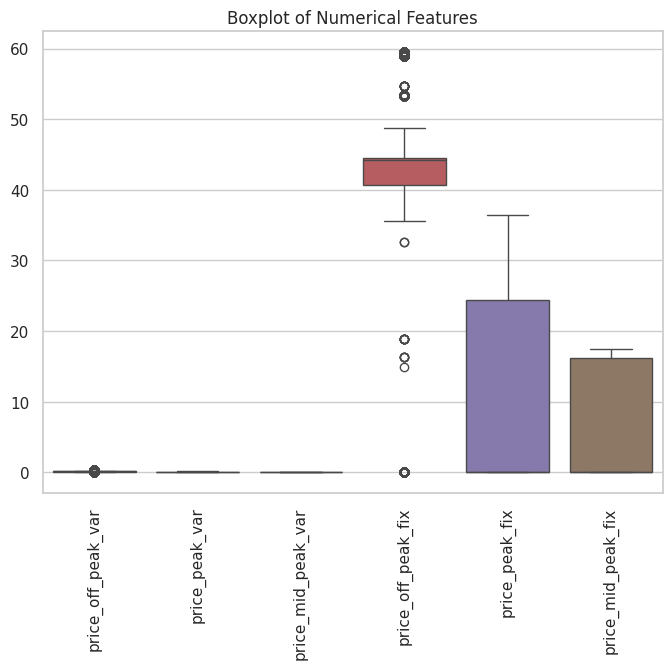

In [45]:
# Boxplot to Analyze Outliers
# Boxplot for numerical features
plt.figure(figsize=(8, 6))
sns.boxplot(data=price_df.select_dtypes(include=np.number))
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()